# Crowdsourced parental leave data from 1,601 companies across different industries, including paid/unpaid maternity and paternity leave weeks.

In [1]:
#let importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/things-we-do-for-family-some-bald-guy/parental_leave.csv", encoding='latin1')
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,NaN,NaN,NaN,NaN
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,NaN,NaN,NaN,NaN
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1601 non-null   object 
 1   Industry                1598 non-null   object 
 2   Paid Maternity Leave    1601 non-null   float64
 3   Unpaid Maternity Leave  1494 non-null   float64
 4   Paid Paternity Leave    289 non-null    float64
 5   Unpaid Paternity Leave  64 non-null     float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
dtypes: float64(8), object(2)
memory usage: 125.2+ KB


In [4]:
# Drop the unwanted columns
df.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],inplace=True)

In [5]:
#To check columns were deleted or not
df.columns

Index(['Company', 'Industry', 'Paid Maternity Leave', 'Unpaid Maternity Leave',
       'Paid Paternity Leave', 'Unpaid Paternity Leave'],
      dtype='object')

In [6]:
df.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
count,1601.000000,1494.000000,289.000000,64.000000
mean,10.909119,6.628849,7.332180,7.734375
std,8.024514,9.274953,6.817591,6.831863
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,2.000000,2.000000
50%,11.000000,4.000000,6.000000,6.000000
75%,12.000000,10.000000,12.000000,12.000000
max,52.000000,52.000000,51.000000,29.000000


## 1.Which companies offer the most paid parental leave weeks?

In [7]:
df.isnull().sum()

Company                      0
Industry                     3
Paid Maternity Leave         0
Unpaid Maternity Leave     107
Paid Paternity Leave      1312
Unpaid Paternity Leave    1537
dtype: int64

In [8]:
df['Total Paid Parental Leave'] = df['Paid Maternity Leave'] + df['Paid Paternity Leave'].fillna(0)
print(df['Total Paid Parental Leave'])

0       12.0
1        9.5
2       22.0
3       30.0
4        5.0
        ... 
1596     6.0
1597     2.0
1598     0.0
1599    14.0
1600     0.0
Name: Total Paid Parental Leave, Length: 1601, dtype: float64


In [9]:
#Top 10 company paid leaves for parental leaves
top_companies_paid_leave = df[['Company', 'Total Paid Parental Leave']].sort_values(by='Total Paid Parental Leave', ascending=False).head(10)
print(f"Top Companies Offering the Most Paid Parental Leave Weeks:{top_companies_paid_leave}")

Top Companies Offering the Most Paid Parental Leave Weeks:                         Company  Total Paid Parental Leave
47                Grant Thornton                      102.0
148                    LAC-Group                       67.5
129              Flatiron Health                       60.0
207   Hewlett Packard Enterprise                       52.0
1431                 JHC Systems                       52.0
1023                        ASML                       52.0
991                  Veritas Law                       52.0
1380                 Bitdefender                       52.0
439                MTX Group Inc                       52.0
1493                     WorkJam                       52.0


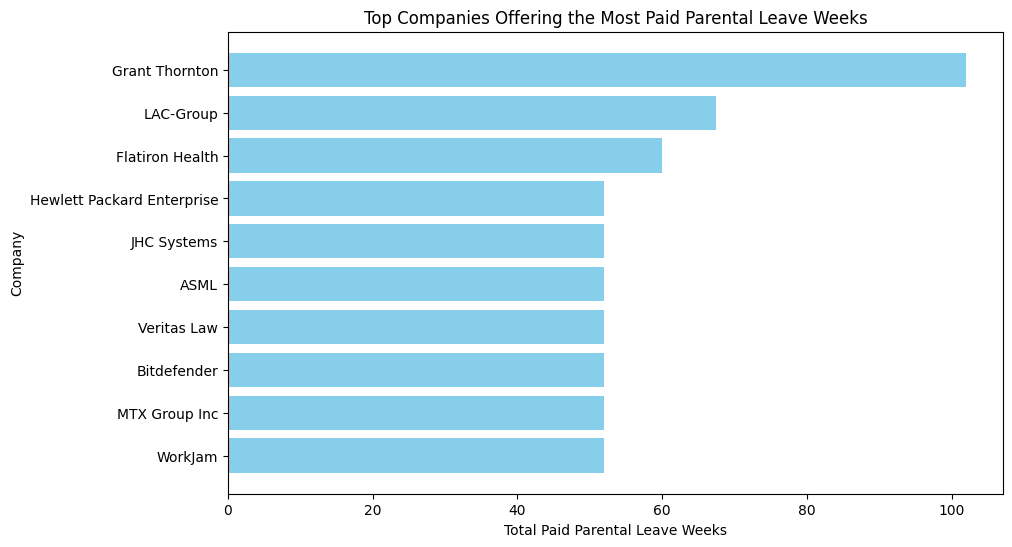

In [10]:
# Plotting the top companies offering the most paid parental leave weeks
plt.figure(figsize=(10, 6))
plt.barh(top_companies_paid_leave['Company'],top_companies_paid_leave['Total Paid Parental Leave'], color='skyblue')
plt.xlabel('Total Paid Parental Leave Weeks')
plt.ylabel('Company')
plt.title('Top Companies Offering the Most Paid Parental Leave Weeks')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

**Grant Thornton companies offer the most paid parental leave weeks with 102 weeks for both male & female**

## 2.Is maternity leave typically longer than paternity leave?

In [11]:
# Calculate the average duration of paid maternity leave
avg_maternity_leave = df['Paid Maternity Leave'].mean()
print(f"Average Maternity Leave: {avg_maternity_leave:.2f} weeks")

Average Maternity Leave: 10.91 weeks


In [12]:
# Calculate the average duration of paid paternity leave
avg_paternity_leave = df['Paid Paternity Leave'].mean()
print(f"Average Paternity Leave: {avg_paternity_leave:.2f} weeks")

Average Paternity Leave: 7.33 weeks


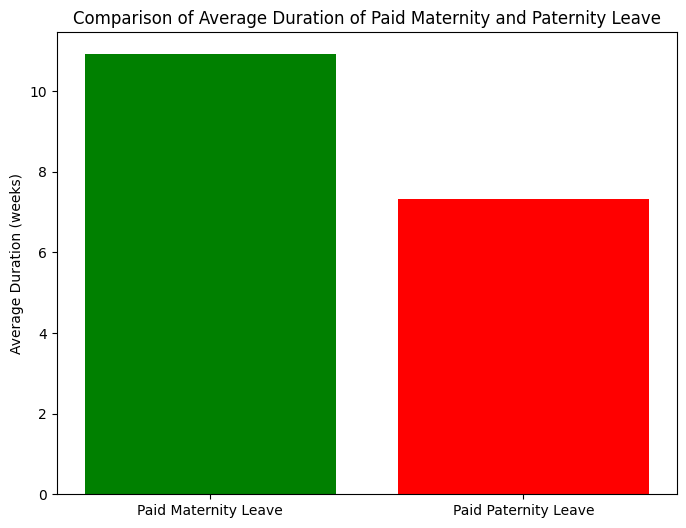

In [13]:
# Plotting the comparison
labels = ['Paid Maternity Leave', 'Paid Paternity Leave']
averages = [avg_maternity_leave, avg_paternity_leave]
plt.figure(figsize=(8, 6))
plt.bar(labels, averages, color=['green', 'red'])
plt.title('Comparison of Average Duration of Paid Maternity and Paternity Leave')
plt.ylabel('Average Duration (weeks)')
plt.show()

**YES,Is maternity leave typically longer than paternity leave because as result paid maternity leave for 10.91 weeks and paid paternity leave for 7.33 weeks**

## 3.What is the distribution of parental leave weeks offered?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


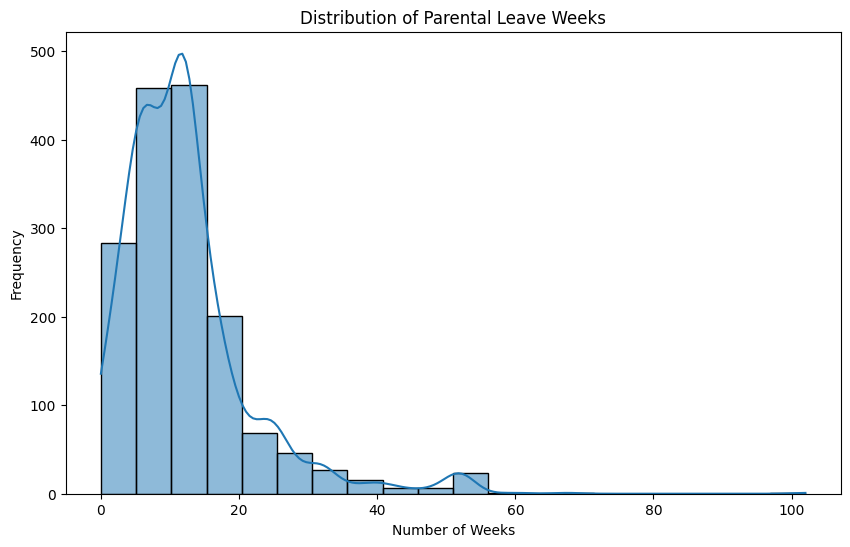

In [14]:
#plot total paid parental leaves weeks
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Total Paid Parental Leave'], bins=20, kde=True)
plt.title('Distribution of Parental Leave Weeks')
plt.xlabel('Number of Weeks')
plt.ylabel('Frequency')
plt.show()

**More parental leave weeks between 5-15 weeks in distribution of parental leave weeks**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

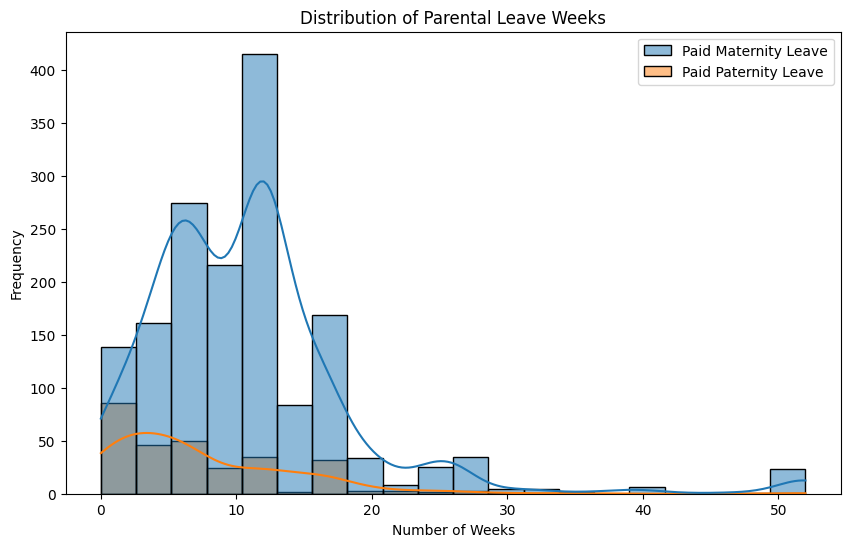

In [15]:
#plot different maternity & paternity leaves weeks
plt.figure(figsize=(10, 6))
sns.histplot(data=df[['Paid Maternity Leave','Paid Paternity Leave']], bins=20, kde=True)
plt.title('Distribution of Parental Leave Weeks')
plt.xlabel('Number of Weeks')
plt.ylabel('Frequency')
plt.show()

**paid maternity leave weeks 11-12 weeks has more leave than paid maternity laeve weeks**

## 4. Are there noticeable differences between industries?

In [16]:
industry_avg_leave = df.groupby('Industry')['Total Paid Parental Leave'].mean()
print("Average Parental Leave Weeks by Industry:")
print(industry_avg_leave)

Average Parental Leave Weeks by Industry:
Industry
Accounting Services             17.000000
Advertising                      9.850000
Advertising: Market Research     9.333333
Aerospace                       14.000000
Arts & Entertainment            12.500000
                                  ...    
Transportation: Rail            14.000000
Transportation: Rental          10.000000
Utilities                        2.000000
Wellness & Fitness              12.000000
Wholesale                        6.666667
Name: Total Paid Parental Leave, Length: 185, dtype: float64


In [17]:
data=industry_avg_leave.sort_values(ascending=False).head(10)

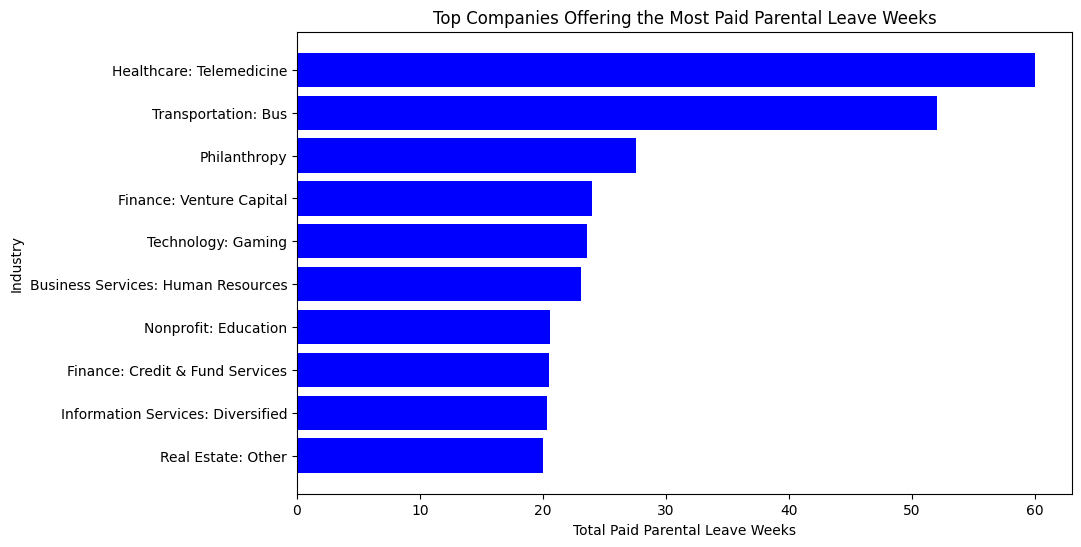

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(data.index,data.values,color='blue')
plt.xlabel('Total Paid Parental Leave Weeks')
plt.ylabel('Industry')
plt.title('Top Companies Offering the Most Paid Parental Leave Weeks')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

**Healthcare: Telemedicine Industry has more number of total paid parental leave weeks**